In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("bestsellers with categories.csv")


# 1-Análise das variáveis, das correlações e os seus detalhes


In [2]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
df = df.drop(columns=['Name','Author'])
df_categorico = df
df = pd.get_dummies(df)

df.head()

,User Rating,Reviews,Price,Year,Genre_Fiction,Genre_Non Fiction
0,4.7,17350,8,2016,False,True
1,4.6,2052,22,2011,True,False
2,4.7,18979,15,2018,False,True
3,4.7,21424,6,2017,True,False
4,4.8,7665,12,2019,False,True


In [4]:
df.corr()

,User Rating,Reviews,Price,Year,Genre_Fiction,Genre_Non Fiction
User Rating,1.000000,-0.001729,-0.133086,0.242383,0.116282,-0.116282
Reviews,-0.001729,1.000000,-0.109182,0.263560,0.280058,-0.280058
Price,-0.133086,-0.109182,1.000000,-0.153979,-0.182761,0.182761
Year,0.242383,0.263560,-0.153979,1.000000,-0.020868,0.020868
Genre_Fiction,0.116282,0.280058,-0.182761,-0.020868,1.000000,-1.000000
Genre_Non Fiction,-0.116282,-0.280058,0.182761,0.020868,-1.000000,1.000000


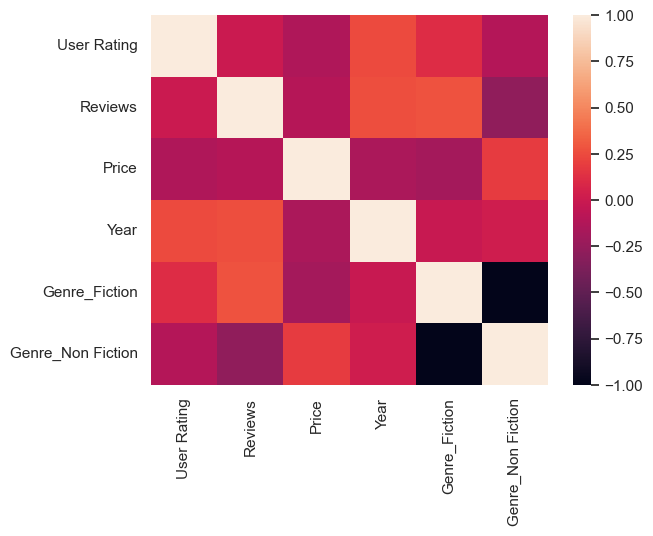

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

sns.heatmap(df.corr(),
        xticklabels=df.columns,
        yticklabels=df.columns)
plt.show()

Através deste mapa podemos perceber que existem corralações entre:
-User Rating e Ano
-Preço e Genero Não Ficticional
-Reviews e Genero Ficticional
-Reviews e Ano

## User Rating vs Ano

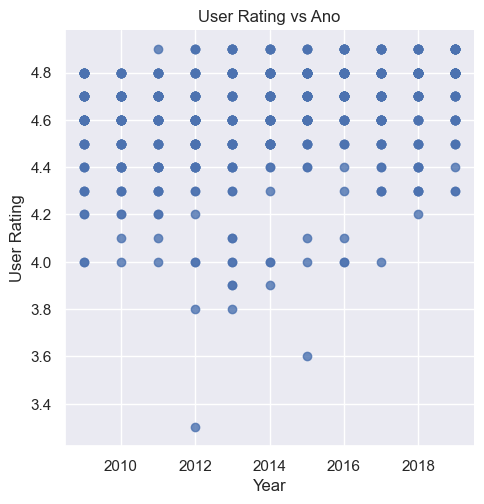

In [6]:
sns.lmplot(
    y='User Rating',
    x='Year',
    data=df[['Year','User Rating']],
    fit_reg=False,
    legend=True
    )

plt.title('User Rating vs Ano')
plt.show()

Através deste gráfico é possivel perceber que o User Rating tem vindo a aumentar ao longo dos anos.

## Preço vs Genero Não Ficticional

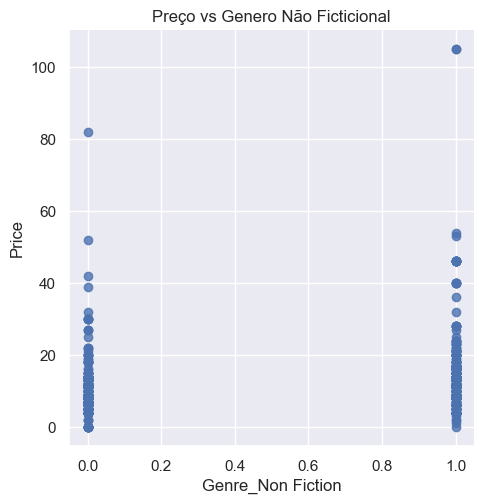

In [7]:
sns.lmplot(
    y='Price',
    x='Genre_Non Fiction',
    data=df[['Price','Genre_Non Fiction']],
    fit_reg=False,
    legend=True
    )

plt.title('Preço vs Genero Não Ficticional')
plt.show()

Tendo em conta que o atributo Género Não Ficticional apenas tem com valor 1 ou 0(não é ou é, respetivamente) então é possivel perceber que existem uma maior densidade de livro que se encontram a preços mais elevados quando não tem como o seu género ficção.

Se este gráfico se tratasse de Preço vs Genero Ficticional seria o inverso nos seu eixo do X!

## Reviews vs Genero Ficticional

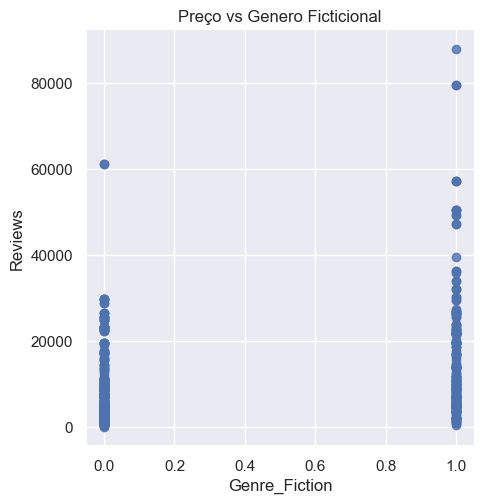

In [8]:
sns.lmplot(
    y='Reviews',
    x='Genre_Fiction',
    data=df[['Reviews','Genre_Fiction']],
    fit_reg=False,
    legend=True
    )

plt.title('Preço vs Genero Ficticional')
plt.show()

Neste gráfico parecido ao mencionado anteriormente é possivel perceber que livro sobre ficção tendem a ter maior número de reviews.

Se este gráfico se tratasse de Reviews vs Genero Não Ficticional seria o inverso no seu eixo do X!

## Reviews e Ano

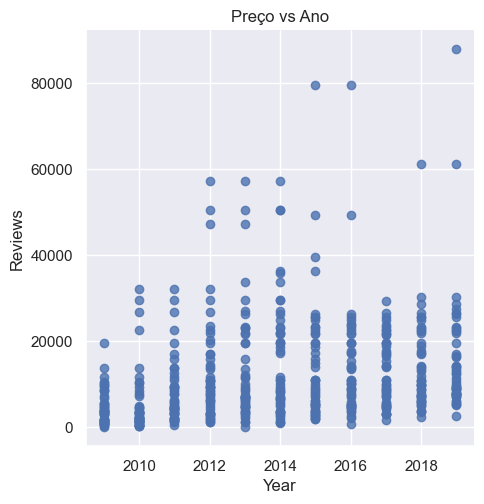

In [9]:
sns.lmplot(
    y='Reviews',
    x='Year',
    data=df[['Reviews','Year']],
    fit_reg=False,
    legend=True
    )

plt.title('Preço vs Ano')
plt.show()

Este grafico infelizmente não nos transmite grandes conclusões apesar de exister algum aumento nos primeiros anos.

## Outliers

In [10]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


Histograma das Reviews

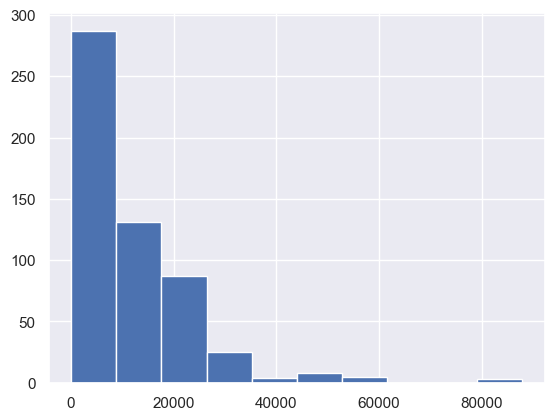

In [11]:
counts, bins = np.histogram(df.Reviews)
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

No grafico acima percebemos que o número de reviews está muito centrado no inicio logo utilizaremos IQR

In [12]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [13]:
outliers =  find_outliers_IQR(df.Reviews)
print('Número de outliers: ' +  str(len(outliers)))
print('Min: ' + str(outliers.min()))
print('Max: ' + str(outliers.max()))

Número de outliers: 17
Min: 39459
Max: 87841


Box plot do preço

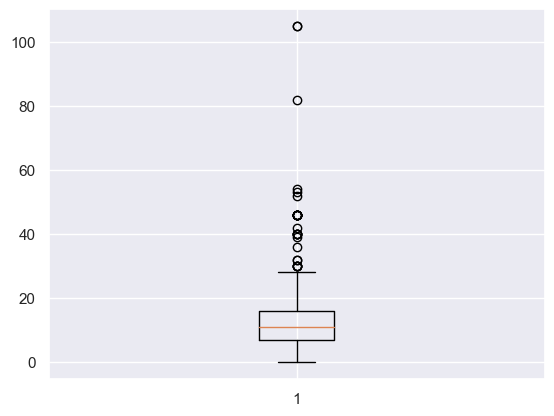

In [14]:
plt.boxplot(df.Price)
plt.show()

In [15]:
outliers =  find_outliers_IQR(df.Price)
print('Número de outliers: ' +  str(len(outliers)))
print('Min: ' + str(outliers.min()))
print('Max: ' + str(outliers.max()))

Número de outliers: 31
Min: 30
Max: 105


# 3.Problema dos zeros
O nosso grupo tomou a decisão de que o mais acertado seria remover as linhas que contêm o preco igual a zero, pois tomamos esse acontecimento como se nunca tivesse sido sequer vendido, então não faz sentido encontrar-se dentro do grupo de dados que vamos analisar

In [16]:
df = df.drop(df[df['Price'] == 0].index)
df.to_excel("output.xlsx")
print(df)

ModuleNotFoundError: No module named 'openpyxl'

# 4.Processamento de dados


### A: O DataFrame utilizado acima ja esta completamente numerico

In [ ]:
df.dtypes

### B:

In [ ]:
df_categorico = df_categorico.astype('category')
df_categorico.dtypes

# 5.Normalização dos dados

## Z-Score
Na tecnica chamada como z-score o procedimento é utilizada uma formula para a conversão dos atributos:


In [ ]:
def normalize_zscore(col):
    return (col - col.mean()) / col.std()
df2 = df.drop(columns=['Genre_Fiction','Genre_Non Fiction'])
df_normalized_zscore = df2.apply(normalize_zscore)
df_normalized_zscore.head()

Desta maneira obtemos valores com média zero e variância unitária

## MinMax
Esta tecnica coloca os valores num intervalo de 0 e 1 utilizando a formula abaixo

In [ ]:
def normalize_minmax(col):
    return ((col - col.min()) / (col.max() - col.min()))
df2 = df.drop(columns=['Genre_Fiction','Genre_Non Fiction'])
df_normalized_minmax = df2.apply(normalize_minmax)
df_normalized_minmax.head()

## Diferenças entre os dois
Estas duas técnicas têm o mesmo objetivo, mas atingem-no de maneira diferente:
- O z-score a retorna a sua variancia unitaria do zero(a média).
- O minmax coloca os valores num intervalo de 0 e 1 dividindo a difença do valor atual e o minimo da coluna pela diferença do maximo e do minimo.

# 6.PCA E t-SNE

In [ ]:
target = {k: v for k, v in enumerate(list(df.Price.unique()))}
df.Price.unique()
df.head()

## A:

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

X = df[['User Rating', 'Year', 'Reviews']]
y = df['Price']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

In [ ]:
df_pca = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
df_pca['Price'] = y.values

In [ ]:
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Price'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
X = df[['User Rating', 'Year', 'Reviews']]
y = df['Price']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

In [ ]:
df_tsne = pd.DataFrame(data = X_tsne, columns = ['TSNE1', 'TSNE2'])
df_tsne['Price'] = y.values

In [ ]:
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=df_tsne['Price'])
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.colorbar()
plt.show()

##B:

In [ ]:
df_categorico.head()

In [ ]:
X = df_categorico[['User Rating', 'Year', 'Reviews']]
y = df_categorico['Price']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

In [ ]:
df_pca = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
df_pca['Price'] = y.values

In [ ]:
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Price'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

In [ ]:
df_tsne = pd.DataFrame(data = X_tsne, columns = ['TSNE1', 'TSNE2'])
df_tsne['Price'] = y.values

In [ ]:
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=df_tsne['Price'])
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.colorbar()
plt.show()